<h1>GESIS Summer School in Survey Methodology 2018:<br> Meta-Analysis in Social Research and Survey Methodology<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

## Preliminaries

Please do not touch anything in this section, otherwise this notebook might not work properly. You have been warned! Also, if you have no clue what you are staring at, please consult our [Preface chapter](1-1_preface.ipynb).

In [1]:
source("run_me_first.R")

Loading required package: Matrix
Loading 'metafor' package (version 2.0-0). For an overview 
and introduction to the package please type: help(metafor).


## Exercise

One of the first steps when conducting a meta-analysis is a graphical inspection of the data and one of the most common graphs in meta-analysis are forest plots. So, in this exercise you are requested to create a forest plot using the function `forest()` and the `dat.bcg` data (use risk ratios as effect size). Check the `metafor` introduction slides for further help.

The minimal version of the forest plot looks, well, very minimal. You are welcome to enhance your forest
plot by adding labels, summary effects etc. See below for an example. Play a bit around with different
options and meta-analytic models.

In [2]:
## Please insert your solution here. Of course, feel free to add new code cells.

trial,author,year,tpos,tneg,cpos,cneg,ablat,alloc,yi,vi
1,Aronson,1948,4,119,11,128,44,random,-0.88931133,0.325584765
2,Ferguson & Simes,1949,6,300,29,274,55,random,-1.58538866,0.194581121
3,Rosenthal et al,1960,3,228,11,209,42,random,-1.34807315,0.415367965
4,Hart & Sutherland,1977,62,13536,248,12619,52,random,-1.44155119,0.020010032
5,Frimodt-Moller et al,1973,33,5036,47,5761,13,alternate,-0.21754732,0.051210172
6,Stein & Aronson,1953,180,1361,372,1079,44,alternate,-0.78611559,0.006905618
7,Vandiviere et al,1973,8,2537,10,619,19,random,-1.62089822,0.223017248
8,TPT Madras,1980,505,87886,499,87892,13,random,0.01195233,0.003961579
9,Coetzee & Berjak,1968,29,7470,45,7232,27,random,-0.46941765,0.056434210
10,Rosenthal et al,1961,17,1699,65,1600,42,systematic,-1.37134480,0.073024794



Random-Effects Model (k = 13; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.3132 (SE = 0.1664)
tau (square root of estimated tau^2 value):      0.5597
I^2 (total heterogeneity / total variability):   92.22%
H^2 (total variability / sampling variability):  12.86

Test for Heterogeneity: 
Q(df = 12) = 152.2330, p-val < .0001

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub     
 -0.7145  0.1798  -3.9744  <.0001  -1.0669  -0.3622  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


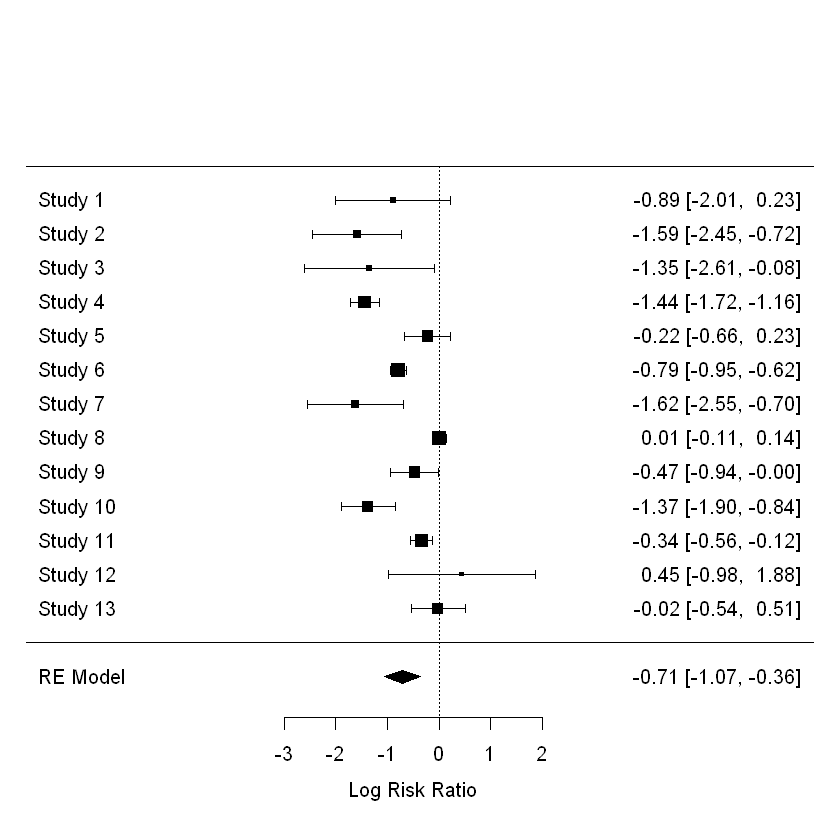

In [24]:
library(metafor)
dat <- escalc(measure="RR", ai=tpos, bi=tneg, ci=cpos, di=cneg, data=dat.bcg, slab=paste(author, year, sep=", "))
dat
              
mydata <- rma(measure="RR", ai=tpos, bi=tneg, ci=cpos, di=cneg, data=dat, method="REML")
mydata

forest(mydata)

In [17]:
dat.bcg

trial,author,year,tpos,tneg,cpos,cneg,ablat,alloc
1,Aronson,1948,4,119,11,128,44,random
2,Ferguson & Simes,1949,6,300,29,274,55,random
3,Rosenthal et al,1960,3,228,11,209,42,random
4,Hart & Sutherland,1977,62,13536,248,12619,52,random
5,Frimodt-Moller et al,1973,33,5036,47,5761,13,alternate
6,Stein & Aronson,1953,180,1361,372,1079,44,alternate
7,Vandiviere et al,1973,8,2537,10,619,19,random
8,TPT Madras,1980,505,87886,499,87892,13,random
9,Coetzee & Berjak,1968,29,7470,45,7232,27,random
10,Rosenthal et al,1961,17,1699,65,1600,42,systematic


In [14]:
## Please insert your solution here. Of course, feel free to add new code cells.

## Exercise

By looking at your forest plot, would you say that you have a homogeneous or a heterogeneous effect-size
distribution?

In [5]:
## Please insert your solution here. Of course, feel free to add new code cells.

## Exercise

Finally, we need to calculate $I_2$ and $H_2$ . You can do this with the `rma()` function. Given your $I_2$ statistic, how would you classify the amount of heterogeneity? (If you like, you can play around with different methods of estimation, e.g. DerSimonian-Laird or the restricted maximum-likelihood estimator. How does this affect your estimates and conclusions about the effect-size heterogeneity?)

In [6]:
## Please insert your solution here. Of course, feel free to add new code cells.

In [7]:
## Please insert your solution here. Of course, feel free to add new code cells.